In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.23.3
pandas version: 1.5.0
scikit-learn version: 1.1.2
matplotlib version: 3.6.0


In [2]:
dfRelevant = pd.DataFrame()

In [3]:
df = pd.read_csv("../data/IGN_data.csv",index_col=0)


In [4]:
df.sample(10)

,game,developers,publishers,franchises,features,released_date,platform,genres,score,score_text,esrb,esrb_info
1051,Disney Epic Mickey,['Junction Point Studios'],"['Disney Interactive Studios', 'Nintendo']",['Disney'],['Number Of Players'],2010-11-25 00:00:00,['Wii'],"['Action', 'Adventure']",8.0,great,Everyone,['Cartoon Violence']
6240,Super Monkey Ball: Banana Mania,['Ryu Ga Gotoku Studio'],['SEGA'],['Super Monkey Ball'],"['Online Leaderboards', 'Offline Versus Multip...",2021-10-05 00:00:00,"['PlayStation 4', 'Nintendo Switch', 'PlayStat...","['Action', 'Puzzle']",6.0,okay,Everyone 10+,['Cartoon Violence']
8478,Nintendo Switch Lite,NaN,['Nintendo'],NaN,NaN,2019-09-20 00:00:00,['Nintendo Switch'],"['Hardware', 'Console']",8.3,great,NaN,NaN
3163,Hearts of Iron II,['Paradox Interactive'],['Paradox Interactive'],NaN,"['Number Of Players', 'Memory Card']",2005-01-04 00:00:00,['PC'],['Strategy'],8.7,great,Everyone,['Violence']
7057,Fighter Maker 2,['Enterbrain'],['Agetec'],['Fighter Maker'],"['Number Of Players', 'Memory Card', 'Vibratio...",2002-07-29 00:00:00,['PlayStation 2'],['Fighting'],7.5,good,Teen,"['Realistic Violence', 'Animated Violence']"
7764,Need for Speed Most Wanted,['Criterion Games'],['Electronic Arts'],['Need for Speed'],"['Online', 'Kinect', 'Steam Deck Playable']",2012-10-02 00:00:00,"['Xbox 360', 'PlayStation 3', 'PlayStation Vit...","['Action', 'Racing']",9.0,amazing,Everyone 10+,"['Violence', 'Comic Mischief', 'Alcohol Refere..."
2733,Tiger Woods PGA Tour 08 [Wii],['EA Tiburon'],['Electronic Arts'],NaN,NaN,2007-08-28 00:00:00,['Wii'],['Sports'],7.1,good,Everyone,NaN
2369,FlatOut: Head On,"['Six By Nine', 'Bugbear Entertainment']","['Empire Interactive', 'Warner Bros. Interact...",['FlatOut'],"['Memory Card', 'Multi-cartridge Multiplayer']",2008-03-11 00:00:00,['PlayStation Portable'],['Racing'],7.7,good,Teen,NaN
10591,Dragon Master: Spell Caster,['Stickmen Studios'],['Stickmen Studios'],NaN,['Number Of Players'],2009-11-09 00:00:00,['Wii'],['Action'],2.5,painful,Everyone 10+,['Mild Fantasy Violence']
6165,Godfall,['Counterplay Games'],['Gearbox Publishing'],NaN,['Online Co-Op Multiplayer'],2020-11-12 00:00:00,"['Xbox One', 'Xbox Series X|S', 'PlayStation 4...","['RPG', 'Shooter']",6.0,okay,Teen,"['Violence', 'Animated Blood', ' Users Interact']"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11362 entries, 0 to 11361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           11362 non-null  object 
 1   developers     11050 non-null  object 
 2   publishers     11282 non-null  object 
 3   franchises     6165 non-null   object 
 4   features       8668 non-null   object 
 5   released_date  11307 non-null  object 
 6   platform       11362 non-null  object 
 7   genres         11339 non-null  object 
 8   score          11319 non-null  float64
 9   score_text     11319 non-null  object 
 10  esrb           9490 non-null   object 
 11  esrb_info      8569 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


here I take out all the null values of the values I think is important

In [6]:
dfPub = df
dfPub = dfPub[dfPub.publishers.notna()]
dfDates = dfPub
dfDates = dfPub[dfPub.released_date.notna()]
dfGenres = dfDates
dfGenres = dfDates[dfDates.genres.notna()]
dfFeatures = dfGenres
dfFeatures = dfFeatures[dfFeatures.features.notna()]
dfScore = dfFeatures
dfScore = dfScore[dfScore.score.notna()]
dfScore.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8584 entries, 0 to 11359
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game           8584 non-null   object 
 1   developers     8467 non-null   object 
 2   publishers     8584 non-null   object 
 3   franchises     4700 non-null   object 
 4   features       8584 non-null   object 
 5   released_date  8584 non-null   object 
 6   platform       8584 non-null   object 
 7   genres         8584 non-null   object 
 8   score          8584 non-null   float64
 9   score_text     8584 non-null   object 
 10  esrb           7476 non-null   object 
 11  esrb_info      6771 non-null   object 
dtypes: float64(1), object(11)
memory usage: 871.8+ KB


In [7]:
shape = dfScore.shape


dfRelevant["released_date_f"] = pd.to_datetime(dfScore["released_date"]).astype(int) / 10**9
# creating a column with datetime properly formatted

# creating predictors to build basic ML model that we can add further complexity to later

# dfGenres["publishers_f"] =dfGenres["publishers"].astype("category").cat.codes # ->one hot encoding
# dfGenres["features_f"] = dfGenres["features"].astype("category").cat.codes # ->one hot encoding
# dfGenres["platform_f"] = dfGenres["platform"].astype("category").cat.codes # ->one hot encoding
# dfGenres["genres_f"] = dfGenres["genres"].astype("category").cat.codes # ->one hot encoding
dfRelevant["esrb_f"] = dfScore["esrb"].astype("category").cat.codes
dfRelevant["score_text_f"] = dfGenres["score_text"].astype("category").cat.codes
dfRelevant["franchises_f"] = dfScore["franchises"].astype("category").cat.codes
#converting from string to categories and then converting those categoties to numbers

In [8]:
for row in dfScore.features:
         if (row):
                row_ = row.strip('[]')
                row_ = row.replace("'", "")
                rowArr = row_.split(',')
                for feature in rowArr:
                    feature = feature.replace('[', "")
                    feature = feature.replace(']', "")
                    dfRelevant.loc[dfFeatures['features'] == row, feature] = 1
                    # dfFeatures[feature].fillna(0)


/tmp/ipykernel_974/959220845.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRelevant.loc[dfFeatures['features'] == row, feature] = 1
/tmp/ipykernel_974/959220845.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRelevant.loc[dfFeatures['features'] == row, feature] = 1
/tmp/ipykernel_974/959220845.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [9]:
for row in dfScore.publishers:
         if (row):
                row_ = row.replace('[', "")
                row_ = row.replace(']', "")
                row_ = row.replace("'", "")
                rowArr = row_.split(',')
                for publisher in rowArr:
                    publisher = publisher.replace('[', "")
                    publisher = publisher.replace(']', "")
                    dfRelevant.loc[dfFeatures['publishers'] == row, publisher] = 1
                    # dfFeatures[publisher].fillna(0)


/tmp/ipykernel_974/2128030394.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRelevant.loc[dfFeatures['publishers'] == row, publisher] = 1
/tmp/ipykernel_974/2128030394.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfRelevant.loc[dfFeatures['publishers'] == row, publisher] = 1
/tmp/ipykernel_974/2128030394.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

In [21]:
dfScore

,game,developers,publishers,franchises,features,released_date,platform,genres,score,score_text,esrb,esrb_info
0,Magic & Mayhem,['Mythos Games'],['Bethesda Softworks'],NaN,"['Memory Card', 'Online']",1999-05-15 00:00:00,['PC'],['Strategy'],7.3,good,Teen,['Animated Violence']
1,Fishing Master [2007],['Hudson Soft'],"['Konami', 'Hudson Soft']",NaN,"['Number Of Players', 'Local - VS # of Players']",2006-03-29 00:00:00,['Wii'],['Hunting'],5.5,mediocre,Everyone,['Mild Language']
2,Far Cry 2,"['Gameloft', 'Ubisoft Montreal']","['Ubisoft', 'Gameloft']",['Far Cry'],"['Memory Card', 'Vibration', 'DualShock', 'Mem...",2008-10-21 00:00:00,"['Luna', 'PC', 'Wireless', 'Xbox 360', 'PlaySt...",['Shooter'],8.9,great,Mature,"['Intense Violence', 'Drug Reference', 'Strong..."
3,Pro 18: World Tour Golf,['Psygnosis'],"['Psygnosis', 'Electro Source']",NaN,"['Number Of Players', 'Memory Card', 'Online']",1999-03-31 00:00:00,"['PC', 'PlayStation']",['Sports'],3.0,awful,Everyone,"['Suitable for Persons Ages Six and Older', 'N..."
4,Bust A Groove,['Metro Corporation (aka Metro Graphics)'],"['Sony Computer Entertainment', 'Enix', '989 S...",['Bust a Groove'],"['Number Of Players', 'Memory Card', 'Vibration']",1998-04-27 00:00:00,['PlayStation'],"['Action', 'Music']",9.0,amazing,Everyone,['Mild Language']
...,...,...,...,...,...,...,...,...,...,...,...,...
11355,Hard Rock Casino,"['JAMDAT', 'FarSight Studios']","['Hexacto', 'JAMDAT', 'MumboJumbo', 'Crave Ent...",NaN,"['Online', 'Number Of Players', 'Memory Card',...",2004-01-12 00:00:00,"['PlayStation 2', 'PlayStation Portable', 'Wir...",['Casino'],7.0,good,Everyone,"['Simulated Gambling', 'Mild Language', 'Use o..."
11356,Tron,"['Bally Midway', 'Backbone Entertainment']","['Bally Midway', 'Disney Interactive Studios']",['Tron'],"['Number Of Players', 'Online - VS Number Of P...",1982-01-01 00:00:00,"['Xbox 360', 'Arcade']",['Action'],4.9,bad,NaN,NaN
11357,Air Raid: This is Not a Drill,['Made by Kiddies'],['Big City Games'],NaN,"['Mouse Feedback', 'Online', 'Memory Card', 'N...",2003-07-01 00:00:00,['PC'],['Shooter'],2.2,painful,Teen,['Realistic Violence']
11358,Charge'n Blast,['Sims'],"['Xicat Interactive', 'SVG Distribution']",NaN,"['Number Of Players', 'Vibration', 'Memory Card']",2000-12-07 00:00:00,['Dreamcast'],['Action'],7.5,good,Teen,['Animated Violence']


In [11]:
dfRelevant = dfRelevant.fillna(0)

In [12]:
from sklearn.model_selection import train_test_split
scoring_X = dfRelevant
scoring_y = (dfScore['score']*10).astype(int)

X_train_scoring, X_test_scoring, y_train_scoring, y_test_scoring = train_test_split(scoring_X, scoring_y, test_size=0.2)

In [13]:
X_test_scoring

,released_date_f,esrb_f,score_text_f,franchises_f,Memory Card,Online,Number Of Players,Local - VS # of Players,Vibration,DualShock,...,BadLand Games,ZeniMax Media,Compile,ZA/UM,Marvel Interactive,Epoch,Commodore,Hexacto,Bally Midway,Big City Games
8051,1.335830e+09,5,3,-1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1344,1.323907e+09,-1,3,-1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10274,1.163462e+09,1,2,1129,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5393,1.070582e+09,5,4,-1,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931,1.130717e+09,5,3,1163,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,1.196294e+09,5,7,-1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580,1.189037e+09,2,7,-1,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8064,1.305763e+09,5,4,-1,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3174,9.113472e+08,1,7,0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y_test_scoring

8051     70
1344     70
10274    48
5393     84
1931     70
         ..
8391     68
580      60
8064     80
3174     68
9023     70
Name: score, Length: 1717, dtype: int64

## data visualisation

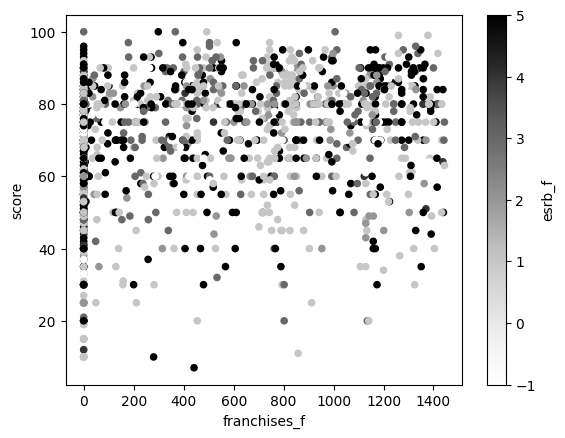

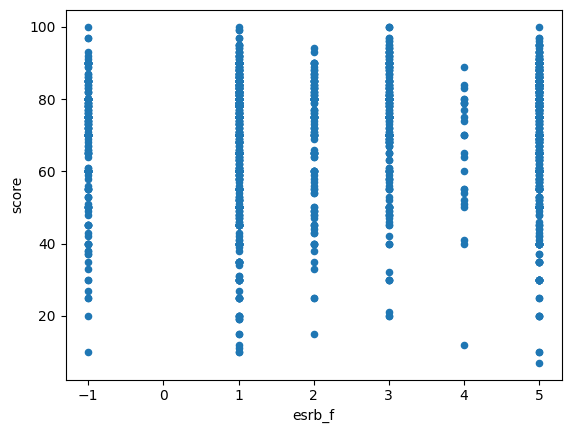

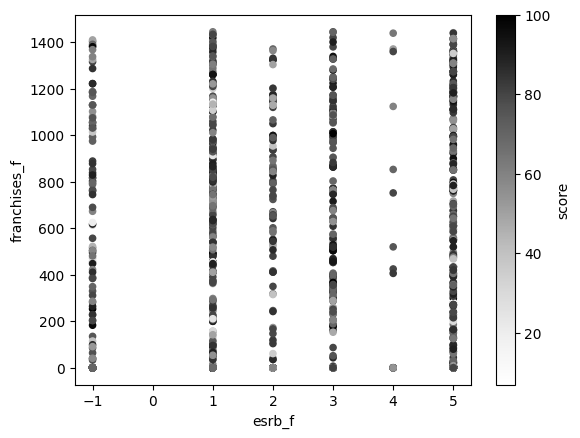

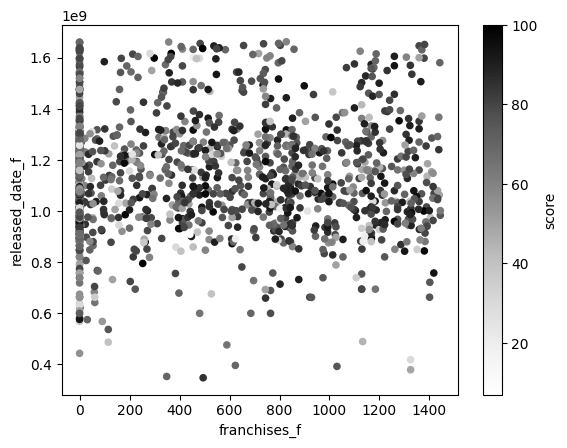

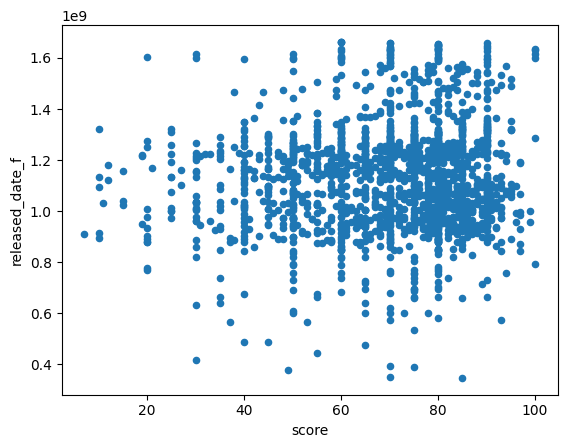

In [22]:
dfTemp = X_test_scoring
dfTemp["score"] = y_test_scoring

ax1 = dfTemp.plot.scatter(x='franchises_f',y='score',c='esrb_f')
ax2 = dfTemp.plot.scatter(x='esrb_f',y='score')
ax3 = dfTemp.plot.scatter(x='esrb_f',y='franchises_f',c='score')
ax4 = dfTemp.plot.scatter(x='franchises_f',y='released_date_f',c='score')

ax5 = dfTemp.plot.scatter(x='score',y='released_date_f')


these visualisations don't show a clear correlation between any of the prominent features. I hope maybe some of the other features like the genres or platforms have a significant influence on the score, but I highly doubt those will show any correlation either.

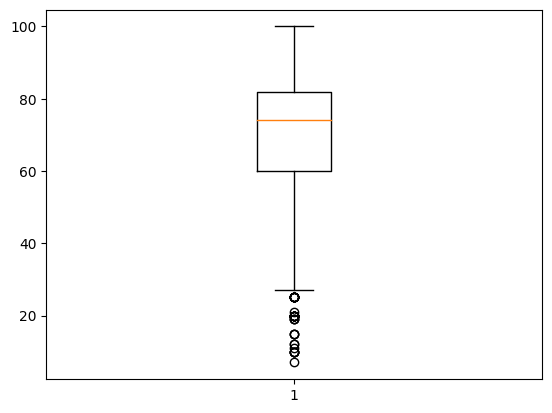

In [23]:
plt.boxplot(dfTemp['score'])
plt.show()

0.3645894001164822

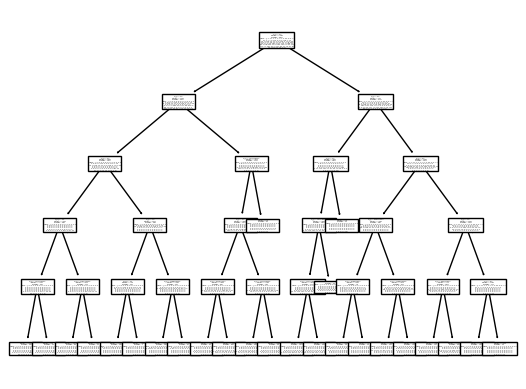

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


treeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
treeModel.fit(X_train_scoring,y_train_scoring)
tree.plot_tree(treeModel)

y_pred_tree = treeModel.predict(X_test_scoring)
accuracy_score(y_test_scoring, y_pred_tree)

In [20]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=2)
rf.fit(X_train_scoring,y_train_scoring)

y_pred = rf.predict(X_test_scoring)
accuracy_score(y_test_scoring, y_pred)

0.2766453115899825